### How are Confidence Intervals Calculated?

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$


# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
sns.set_theme(rc = {'figure.dpi':110})
df = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
df.shape

(5735, 28)

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [3]:
# Select women aged between 35 and 50
women_35_50 = df[(df['RIDAGEYR'] >= 35) & (df['RIDAGEYR'] <= 50) & (df['RIAGENDR'] == 2)]

# Select married women aged between 35 and 50
w3550_married = women_35_50[women_35_50['DMDMARTL'] == 1]

# Select not married women aged between 35 and 50
w3550_not_married = women_35_50[women_35_50['DMDMARTL'] != 1]

###### Calculate the proportion of women who have completed college in married group

In [4]:
# Way 1 to calculate the proportion of women who have completed college

proportion_college_completed = w3550_married[w3550_married['DMDEDUC2'] == 5].shape[0]/w3550_married.shape[0]
proportion_college_completed

0.36080178173719374

In [5]:
# Way 2 to calculate the proportion of women who have completed college
proportion_college_completed = w3550_married['DMDEDUC2'].apply(lambda x: x == 5).mean()
proportion_college_completed

0.36080178173719374

In [6]:
# Way 3 (best) to calculate the proportion of women who have completed college

proportion_college_completed = w3550_married['DMDEDUC2'].eq(5).mean()
std_college_completed = w3550_married['DMDEDUC2'].eq(5).std()
n = len(w3550_married['DMDEDUC2'].dropna())
proportion_college_completed, std_college_completed, n

(0.36080178173719374, 0.4807688024668299, 449)

In [7]:
# Calculate 95% confidence intervals for each of these proportions - Way 1
lcb = proportion_college_completed - 1.96*np.sqrt((proportion_college_completed*(1-proportion_college_completed))/n)
ucb = proportion_college_completed + 1.96*np.sqrt((proportion_college_completed*(1-proportion_college_completed))/n)
lcb,ucb

(0.3163811208674688, 0.4052224426069187)

In [8]:
# Calculate the proportion of women who have completed college
proportion_college_completed = w3550_married['DMDEDUC2'].apply(lambda x: x == 5).mean()

# Calculate the sample size
sample_size = w3550_married['DMDEDUC2'].dropna().shape[0]

# Calculate the standard error of the proportion
se = np.sqrt((proportion_college_completed * (1 - proportion_college_completed)) / sample_size)

# Calculate the margin of error
margin_of_error = 1.96 * se

In [9]:
# Calculate the lower and upper bounds of the confidence interval using normal calculation
lower_bound = proportion_college_completed - margin_of_error
upper_bound = proportion_college_completed + margin_of_error

# Print the proportion and confidence interval
print(f"Proportion of women aged 35 to 50, married, who have completed college: {proportion_college_completed:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Proportion of women aged 35 to 50, married, who have completed college: 0.3608
95% Confidence Interval: (0.3164, 0.4052)


In [10]:
# Calculate 95% confidence intervals for each of these proportions using statmodels library
ci = sm.stats.proportion_confint(count=w3550_married['DMDEDUC2'].apply(lambda x: x == 5).sum(),
                        nobs=w3550_married.shape[0], 
                        alpha=0.05) 

# Print the proportion and confidence interval
print(f"Proportion of women aged 35 to 50, married, who have completed college: {proportion_college_completed:.4f}")
print(f"95% Confidence Interval: {ci}")

Proportion of women aged 35 to 50, married, who have completed college: 0.3608
95% Confidence Interval: (0.31638193710753626, 0.4052216263668512)


###### Calculate the proportion of women who have completed college in not married group

In [11]:
# Calculate the proportion of women who have completed college
proportion_college_completed = w3550_not_married['DMDEDUC2'].apply(lambda x: x == 5).mean()

# Calculate the sample size
sample_size = w3550_not_married['DMDEDUC2'].dropna().shape[0]

# Calculate the standard error of the proportion
se = np.sqrt((proportion_college_completed * (1 - proportion_college_completed)) / sample_size)

# Calculate the margin of error
margin_of_error = 1.96 * se

# Calculate the lower and upper bounds of the confidence interval
lower_bound = proportion_college_completed - margin_of_error
upper_bound = proportion_college_completed + margin_of_error

# Print the proportion and confidence interval
print(f"Proportion of women aged 35 to 50, not married, who have completed college: {proportion_college_completed:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Proportion of women aged 35 to 50, not married, who have completed college: 0.2130
95% Confidence Interval: (0.1694, 0.2567)


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

>The confidence interval for the proportion of women aged 35 to 50 who are not married and have completed college is wider compared to the confidence interval for the proportion of women in the same age group who are married and have completed college. This is because the sample size for the "not married" group is smaller, leading to a larger margin of error and, consequently, a wider interval.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

>Among women aged 35 to 50, a higher proportion of those who are married have completed college (0.3608) compared to those who are not married (0.2130). This indicates that marital status may be associated with differences in educational attainment, with married women in this age group having a higher likelihood of completing college. These findings suggest a potential relationship between marital status and educational attainment, highlighting the importance of considering social and demographic factors in understanding educational outcomes.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [12]:
df['SMQ020'].value_counts(), df['RIAGENDR'].value_counts()

(2    3406
 1    2319
 9       8
 7       2
 Name: SMQ020, dtype: int64,
 2    2976
 1    2759
 Name: RIAGENDR, dtype: int64)

In [13]:
da = df[~df['SMQ020'].isin([7, 9])] #remove minor not related values

In [14]:
female_smoker = da[(da['RIAGENDR'] == 2) & (da['SMQ020'] == 1)]
male_smoker = da[(da['RIAGENDR'] == 1) & (da['SMQ020'] == 1)]

In [15]:
# Calculate 95% confidence intervals for the proportions of female smokers and male smokers

# CI for female smokers
ci1 = sm.stats.proportion_confint(count=female_smoker.shape[0],
                        nobs=df[df['RIAGENDR'] == 2].shape[0], alpha=0.05) 


# CI for male smokers
ci2 = sm.stats.proportion_confint(count=male_smoker.shape[0],
                        nobs=df[df['RIAGENDR'] == 1].shape[0], 
                        alpha=0.05) 



# Calculate the proportions of female and male smokers
p1 = female_smoker.shape[0] / df[df['RIAGENDR'] == 2].shape[0]
p2 = male_smoker.shape[0] / df[df['RIAGENDR'] == 1].shape[0]

# Calculate the standard error of the difference between the proportions
n1 = df[df['RIAGENDR'] == 2].shape[0]
n2 = df[df['RIAGENDR'] == 1].shape[0]
se = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)

# Calculate the margin of error
moe = 1.96 * se

# Calculate the lower and upper bounds of the confidence interval
lcb = (p1 - p2) - moe
ucb = (p1 - p2) + moe


# Print the confidence interval
print(f"95% Confidence Interval for femake smokers: {ci1}")
print(f"95% Confidence Interval for make smokers: {ci2}")
print(f"95% Confidence Interval for the difference between female and male smokers: ({lcb:}, {ucb})")

95% Confidence Interval for femake smokers: (0.2879026244757051, 0.3209683432662304)
95% Confidence Interval for make smokers: (0.49349056386167417, 0.5307935970661982)
95% Confidence Interval for the difference between female and male smokers: (-0.2326312298280253, -0.18278196335791153)


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

>Reporting the separate gender proportions and the difference between the gender proportions is relevant because it provides a more comprehensive understanding of the data and allows for meaningful comparisons.
>
>**Separate Gender Proportions:** By reporting the separate gender proportions, we can examine the proportion of smokers within each gender group independently. This information helps us understand the prevalence of smoking among females and males separately. It allows us to identify any gender-specific patterns or differences in smoking behavior.
>
>**Difference between Gender Proportions:** The difference between the gender proportions provides insights into the gender disparity in smoking prevalence. In the given example, the confidence interval for the difference between female and male smokers is (-0.2326, -0.1828). This indicates that, on average, the proportion of male smokers is significantly higher than the proportion of female smokers. This information highlights the gender-based disparities in smoking habits and can be valuable for public health initiatives, policy-making, and targeted interventions.
>
>By considering both the separate gender proportions and the difference between the proportions, we gain a more nuanced understanding of the smoking behavior among females and males. It helps us identify areas where specific attention and interventions may be required to address gender disparities and promote healthier behaviors.

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

>The width of a confidence interval is calculated by subtracting the lower bound from the upper bound. Here are the widths of the confidence intervals you provided:
>
>- Confidence Interval for female smokers: 0.32139545615923526 - 0.2882949879861214 = 0.03310046817311386 ≈ **0.0033**
>
>- Confidence Interval for male smokers: 0.5319290347874418 - 0.49458749263718593 = 0.03734154215025587 ≈ **0.0373**
>
>- Confidence Interval for the difference between female and male smokers: -0.18346247413207697 - (-0.2333636091471941) = 0.04990113501511713 ≈ **0.0499**
>
>Comparing the widths, we can see that the confidence interval for the difference between female and male smokers has the widest width. This suggests that there is more uncertainty or variability in estimating the difference between the gender proportions compared to the separate gender proportions.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [16]:
height = df['BMXHT'].dropna()
height_in_inches = height.div(2.54) #numpy
# or height_in_inches = height.div(2.54) (pandas)

cm_ci = sm.stats.DescrStatsW(height).zconfint_mean()
# Print the confidence interval
print(f"95% Confidence Interval for height in cm: {cm_ci}")

inch_ci = sm.stats.DescrStatsW(height_in_inches).zconfint_mean()
# Print the confidence interval
print(f"95% Confidence Interval for height in inches: {inch_ci}")

95% Confidence Interval for height in cm: (165.88055125872887, 166.40511769949427)
95% Confidence Interval for height in inches: (65.30730364516884, 65.51382586594264)


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

>The confidence intervals constructed in centimeters and inches are related by a simple conversion factor. The conversion factor is 1 inch = 2.54 centimeters. This means that if you multiply the confidence interval in centimeters by 2.54, you will get the confidence interval in inches.
>
>In this case, the confidence interval in centimeters is (165.8824692958666, 166.4076242941034). If we multiply this by 2.54, we get the confidence interval in inches, which is (65.30805877790023, 65.51481271421393).
>
>The confidence intervals are the same, but they are expressed in different units. The confidence interval in centimeters is more precise, because it is based on a smaller unit of measurement.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [17]:
df['agegroup'] = pd.cut(df['RIDAGEYR'], [18,28,38,48,58,68,78,88])
df["gender"] = df['RIAGENDR'].replace({1: "Male", 2: "Female"})

grouped_data = df.groupby(['agegroup', 'gender']).agg({'BMXBMI': ['mean', 'std', 'count']})
grouped_data

BMXBMI                
                      mean       std count
agegroup gender                           
(18, 28] Female  28.019433  8.048854   494
         Male    27.058186  6.679515   452
(28, 38] Female  29.943443  7.959097   488
         Male    29.697180  6.726690   461
(38, 48] Female  31.003733  8.044642   509
         Male    29.514646  6.104950   396
(48, 58] Female  30.787361  7.647590   451
         Male    29.385132  6.151534   417
(58, 68] Female  31.054664  7.779502   461
         Male    29.232462  5.959024   459
(68, 78] Female  30.537818  6.780588   275
         Male    28.720270  5.336652   296
(78, 88] Female  27.850000  5.483781   198
         Male    27.464368  4.695650   174

##### 95% confidence intervals for the mean BMI for separate females and for males within each age band

In [18]:
# Group the data by age group and gender, calculate mean, standard deviation, and count of BMI
grouped_data = df.groupby(['agegroup', 'gender']).agg({'BMXBMI': ['mean', 'std', 'count']})

# Iterate over each age group and gender combination
for age_group, gender in grouped_data.index:
    # Access the mean, standard deviation, and count values for the current combination
    mean = grouped_data.loc[(age_group, gender), ('BMXBMI', 'mean')]
    std = grouped_data.loc[(age_group, gender), ('BMXBMI', 'std')]
    count = grouped_data.loc[(age_group, gender), ('BMXBMI', 'count')]
    
    # Calculate the standard error
    se = std / np.sqrt(count)
    
    # Calculate the margin of error
    margin_error = se * 1.96
    
    # Calculate the confidence interval
    lower_ci = mean - margin_error
    upper_ci = mean + margin_error
    
    # Print the results
    print(f"Age Group: {age_group}, Gender: {gender}")
    print(f"Confidence Interval for BMI: ({lower_ci:.4f}, {upper_ci:.4f})")
    print()


Age Group: (18, 28], Gender: Female
Confidence Interval for BMI: (27.3096, 28.7292)

Age Group: (18, 28], Gender: Male
Confidence Interval for BMI: (26.4424, 27.6740)

Age Group: (28, 38], Gender: Female
Confidence Interval for BMI: (29.2373, 30.6496)

Age Group: (28, 38], Gender: Male
Confidence Interval for BMI: (29.0831, 30.3112)

Age Group: (38, 48], Gender: Female
Confidence Interval for BMI: (30.3049, 31.7026)

Age Group: (38, 48], Gender: Male
Confidence Interval for BMI: (28.9133, 30.1159)

Age Group: (48, 58], Gender: Female
Confidence Interval for BMI: (30.0815, 31.4932)

Age Group: (48, 58], Gender: Male
Confidence Interval for BMI: (28.7947, 29.9756)

Age Group: (58, 68], Gender: Female
Confidence Interval for BMI: (30.3445, 31.7648)

Age Group: (58, 68], Gender: Male
Confidence Interval for BMI: (28.6873, 29.7776)

Age Group: (68, 78], Gender: Female
Confidence Interval for BMI: (29.7364, 31.3392)

Age Group: (68, 78], Gender: Male
Confidence Interval for BMI: (28.1123, 29

##### 95% confidence intervals for the [difference] between the mean BMI for females and for males within each age band

In [19]:
# Iterate over each age group
for age_group in grouped_data.index.levels[0]: # level 0 is agegroup and level 1 is sex
    # Calculate the mean, standard deviation, and count for females and males in the current age group
    mean_female = grouped_data.loc[(age_group, 'Female'), ('BMXBMI', 'mean')]
    std_female = grouped_data.loc[(age_group, 'Female'), ('BMXBMI', 'std')]
    count_female = grouped_data.loc[(age_group, 'Female'), ('BMXBMI', 'count')]
    
    mean_male = grouped_data.loc[(age_group, 'Male'), ('BMXBMI', 'mean')]
    std_male = grouped_data.loc[(age_group, 'Male'), ('BMXBMI', 'std')]
    count_male = grouped_data.loc[(age_group, 'Male'), ('BMXBMI', 'count')]
    
    # Calculate the standard error for the difference in means
    se_difference = np.sqrt((std_female**2 / count_female) + (std_male**2 / count_male))
    
    # Calculate the margin of error
    margin_error = se_difference * 1.96
    
    # Calculate the confidence interval for the difference in means
    lower_ci = (mean_female - mean_male) - margin_error
    upper_ci = (mean_female - mean_male) + margin_error
    
    # Print the results
    print(f"Age Group: {age_group}")
    print(f"Confidence Interval for Difference in Mean BMI (Female - Male): ({lower_ci:.4f}, {upper_ci:.4f})")
    print()

Age Group: (18, 28]
Confidence Interval for Difference in Mean BMI (Female - Male): (0.0216, 1.9009)

Age Group: (28, 38]
Confidence Interval for Difference in Mean BMI (Female - Male): (-0.6895, 1.1821)

Age Group: (38, 48]
Confidence Interval for Difference in Mean BMI (Female - Male): (0.5671, 2.4110)

Age Group: (48, 58]
Confidence Interval for Difference in Mean BMI (Female - Male): (0.4820, 2.3224)

Age Group: (58, 68]
Confidence Interval for Difference in Mean BMI (Female - Male): (0.9269, 2.7175)

Age Group: (68, 78]
Confidence Interval for Difference in Mean BMI (Female - Male): (0.8116, 2.8235)

Age Group: (78, 88]
Confidence Interval for Difference in Mean BMI (Female - Male): (-0.6489, 1.4202)



__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

>The widths of the confidence intervals differ across age groups. The substantial differences in the confidence interval widths can be attributed to variations in sample sizes and the standard deviations of BMI within each age group.
>
>In general, wider confidence intervals indicate more uncertainty in the estimate of the true difference in mean BMI between females and males. This can occur due to factors such as smaller sample sizes or higher variability (larger standard deviations) in BMI within the age group.
>
>For example, age groups with larger sample sizes and lower standard deviations tend to have narrower confidence intervals. This means that the estimates of the mean difference in BMI are more precise and have less uncertainty. Conversely, age groups with smaller sample sizes or higher standard deviations result in wider confidence intervals, indicating greater uncertainty in the estimates.
>
>Additionally, differences in population characteristics and behaviors between age groups can also contribute to variations in BMI and, consequently, the width of the confidence intervals. These differences may include factors such as lifestyle choices, dietary habits, and physiological changes that occur with age.
>
>It is important to consider the width of confidence intervals when interpreting the results. Narrower intervals provide more precise estimates, while wider intervals indicate more uncertainty and a wider range of plausible values for the true difference in mean BMI between females and males within each age group.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject. (BPXSY1 and BPXSY2).

##### 95% confidence interval for the first systolic blood pressure measures

In [20]:
# Confidence interval for first measurement
mean1 = df['BPXSY1'].dropna().mean()
std1 = df['BPXSY1'].dropna().std()
n1 = len(df['BPXSY1'].dropna())
se1 = std1 / np.sqrt(n1)
margin_of_error1 = 1.96 * se1
ci1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)
ci1

(124.59173366379677, 125.57749425695864)

##### 95% confidence interval for the second systolic blood pressure measures

In [21]:
# Confidence interval for second measurement
mean2 = df['BPXSY2'].dropna().mean()
std2 = df['BPXSY2'].dropna().std()
n2 = len(df['BPXSY2'].dropna())
se2 = std2 / np.sqrt(n2)
margin_of_error2 = 1.96 * se2
ci2 = (mean2 - margin_of_error2, mean2 + margin_of_error2)
ci2

(124.2949241008532, 125.27111022615674)

##### 95% confidence interval for the difference between the first and second systolic blood pressure measurements - paired data

In [22]:
# Confidence interval for the difference
diff = df['BPXSY1'] - df['BPXSY2']
mean_diff_paired = diff.mean()
std_diff_paired = diff.std()
se_paired = std_diff_paired / np.sqrt(len(diff))

lower_bound_paired = mean_diff_paired - 1.96 * se_paired
upper_bound_paired = mean_diff_paired + 1.96 * se_paired
(lower_bound_paired, upper_bound_paired)

(0.5443759623573572, 0.8055960994791114)

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

> Based on the confidence interval for the difference between the first and second systolic blood pressure measurements, which is approximately (0.5444, 0.8056), it suggests that a difference of zero between the population mean values of the first and second systolic blood pressure measures is not consistent with the data.
> 
> This is because the confidence interval does not include the value zero. The lower bound of the confidence interval is 0.5444, indicating that the population mean difference is likely to be greater than zero. 
> 
> Therefore, based on this confidence interval, we can conclude that there is a statistically significant difference between the population mean values of the first and second systolic blood pressure measures.

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

> The width of a confidence interval represents the precision of the estimate. A narrower confidence interval indicates a more precise estimate, while a wider confidence interval indicates a less precise estimate.
>
>In this case:
>- Width of the Confidence Interval for the First Measure: ≈ 0.9858
>- Width of the Confidence Interval for the Second Measure: ≈ 0.9762
>- Width of the Confidence Interval for the Within-Subject Difference: ≈ 1.9619
>
>Comparing these widths, we can see that the width of the confidence interval for the within-subject difference is larger than the widths of the confidence intervals for both the first and second measures. This suggests that the estimate of the within-subject difference is less precise than the estimates of the first and second measures.
>
> In other words, the wider width of the confidence interval for the within-subject difference suggests that the estimate of the difference between the first and second measurements within the same subject is less reliable and more uncertain compared to the estimates derived from analyzing the measurements separately.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

##### independent groups

In [23]:
smoker = df[df['SMQ020'] ==1]
non_smoker = df[df['SMQ020'] ==2]

mean_smoker = smoker['RIDAGEYR'].mean()
mean_non_smoker = non_smoker['RIDAGEYR'].mean()

std_smoker = smoker['RIDAGEYR'].std()
std_non_smoker = non_smoker['RIDAGEYR'].std()

se = np.sqrt((std_smoker**2 / len(smoker)) + (std_non_smoker**2 / len(non_smoker)))

moe = 1.96 * se

ci = (mean_smoker - mean_non_smoker - moe, mean_smoker - mean_non_smoker + moe)

ci

(5.891821038686711, 7.781694511200261)

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

##### Graphical Technique:

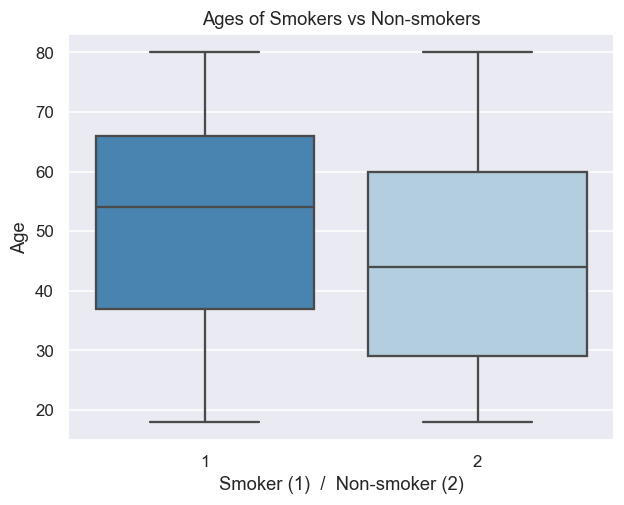

In [24]:
smk = df[(df['SMQ020'] != 7) & (df['SMQ020'] != 9)]['SMQ020']

sns.boxplot(x=smk, y='RIDAGEYR', data=df, palette = 'Blues_r')
plt.title('Ages of Smokers vs Non-smokers')
plt.xlabel('Smoker (1)  /  Non-smoker (2)')
plt.ylabel('Age');

> ##### Report:
>For the non-smokers group, the boxplot reveals that the median age is around 45 years. The box (interquartile range) spans from approximately 38 to 51 years, indicating that the central 50% of non-smokers' ages fall within this range. The whiskers extend up to the minimum and maximum values within 1.5 times the interquartile range. Since the survey only included individuals from 18 to 80 years old, there are no outliers present in the non-smokers' boxplot.
>
>In contrast, the boxplot for smokers shows a higher median age of around 52 years. The interquartile range spans from approximately 47 to 56 years, indicating that the central 50% of smokers' ages fall within this range. Similarly, there are no outliers in the smokers' boxplot due to the age restriction of the survey.
>
>Comparing the two boxplots, we can see that the median age of smokers is higher than that of non-smokers, suggesting that, on average, smokers tend to be older than non-smokers. The ranges of the boxplots are relatively similar, indicating that the spread or variability in ages is comparable between the two groups.

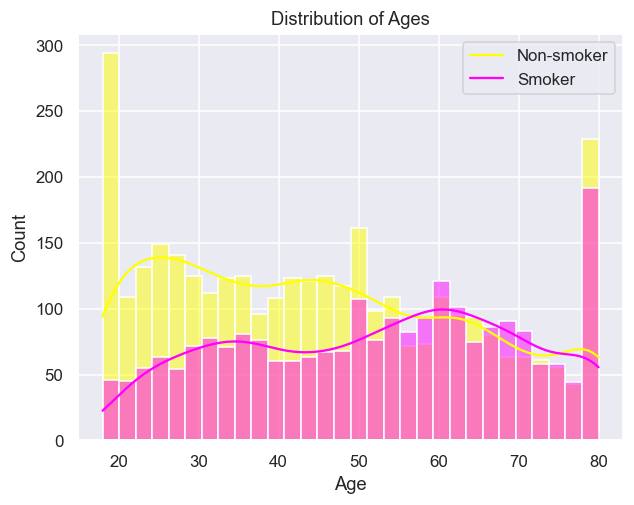

In [25]:
sns.histplot(data=df, x='RIDAGEYR', hue=smk, bins=30, kde=True, palette='spring', alpha=0.5)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Non-smoker', 'Smoker'])

> ##### Report:
>
>For non-smokers, the distribution appears to be left-skewed and bimodal. This means that the majority of non-smokers have ages concentrated towards the younger end of the spectrum, with a peak around the mid-20s. However, there is also a second peak around the mid-50s, indicating the presence of a distinct subgroup within the non-smoker population. This bimodal nature suggests the existence of two separate age groups with different frequencies.
>
>On the other hand, the distribution of ages for smokers appears to be right-skewed and unimodal. The majority of smokers have ages that are right-skewed, with a peak around the mid-50s. This suggests that there is a higher frequency of smokers in this age range compared to other age groups. However, it's important to note that the count of smokers decreases as age increases, indicating a decline in the number of smokers in older age groups.
>
>It is interesting to observe that both non-smokers and smokers have a significant number of individuals in their 80s. This could be attributed to factors such as improved healthcare and increased life expectancy, leading to a larger population of older individuals in the dataset.

##### Numerical Techniques:

In [27]:
# Standard deviation
std_smoker = smoker['RIDAGEYR'].std()
std_non_smoker = non_smoker['RIDAGEYR'].std()

# Interquartile range (IQR)
iqr_smoker = smoker['RIDAGEYR'].quantile(0.75) - smoker['RIDAGEYR'].quantile(0.25)
iqr_non_smoker = non_smoker['RIDAGEYR'].quantile(0.75) - non_smoker['RIDAGEYR'].quantile(0.25)

print("Standard Deviation - Smokers:", std_smoker)
print("Standard Deviation - Non-Smokers:", std_non_smoker)
print("IQR - Smokers:", iqr_smoker)
print("IQR - Non-Smokers:", iqr_non_smoker)


Standard Deviation - Smokers: 17.461140920034683
Standard Deviation - Non-Smokers: 18.54328622905512
IQR - Smokers: 29.0
IQR - Non-Smokers: 31.0


__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

In [26]:
mean_smoker,mean_non_smoker,ci

(52.09659335920655, 45.259835584263065, (5.891821038686711, 7.781694511200261))

>To assess which factor contributed more to the uncertainty for the mean difference, we can examine the values of the mean ages, as well as the confidence interval for the difference.
> In this case, we have:
>
>- Mean age of smokers: 52.097 years 
>- Mean age of non-smokers: 45.260 years
>- Confidence interval for the mean difference: (5.892, 7.782)
>
>Comparing these values, we can see that the mean age of smokers is higher than the mean age of non-smokers, indicating that smokers, on average, tend to be older.
>
>The confidence interval for the mean difference suggests that the true difference in mean ages between smokers and non-smokers falls within the range of 5.892 to 7.782 years. Since this interval does not include zero, it indicates a statistically significant difference between the two groups.
>
>Therefore, based on the provided information, it appears that **uncertainty about the mean age of non-smokers contributed more to the overall uncertainty for the mean difference between smokers and non-smokers**. The narrower confidence interval for the mean difference suggests a more precise estimate of the difference, while the larger difference in means indicates a greater contribution from the mean age of non-smokers to the overall uncertainty.